# Defect

In [11]:
from simulation import Simulation
import random
import matplotlib.pyplot as plt
import numpy as np

In [12]:
def simulate_and_plot(nqubits, lam, maxdepth, pbc=True):

    sim = Simulation()
    sim.initialize(nqubits)

    xs, ys = [], []

    for d in range(maxdepth):
        for i in range(1, nqubits, 2):
            # we only care about the values on even sites (odd in Python 0 indexing)
            expX = sim.peek_x(i)
            if expX == -1:
                xs.append(d)
                ys.append(i)
        sim.E_lambda(random.randint(0, nqubits - 1), lam, pbc)

    xs, ys = np.array(xs), np.array(ys)

    # fig, axs = plt.subplots(2, 1, sharex=True)
    fig, ax = plt.subplot_mosaic("A;A;B", sharex=True)
    axs = [ax["A"], ax["B"]]

    axs[0].set_title(f"$2N = {nqubits}$, $\lambda = {lam}$")
    axs[0].scatter(xs, ys, marker=".", s=0.01, color="k", rasterized=True)
    axs[0].set_ylabel("Sites")
    axs[0].set_xlim([0, maxdepth])

    axs[1].plot(
        range(maxdepth),
        [len(np.where(xs == d)[0]) / nqubits for d in range(maxdepth)],
        "k-",
        rasterized=True,
    )
    axs[1].set_ylabel("Defect density")
    axs[1].set_xlabel("Depth")
    axs[1].set_xlim([0, maxdepth])

    w, h = fig.get_size_inches()
    fig.set_size_inches(0.85 * w, 0.85 * (3 * h / 2))

    return fig

### With PBC

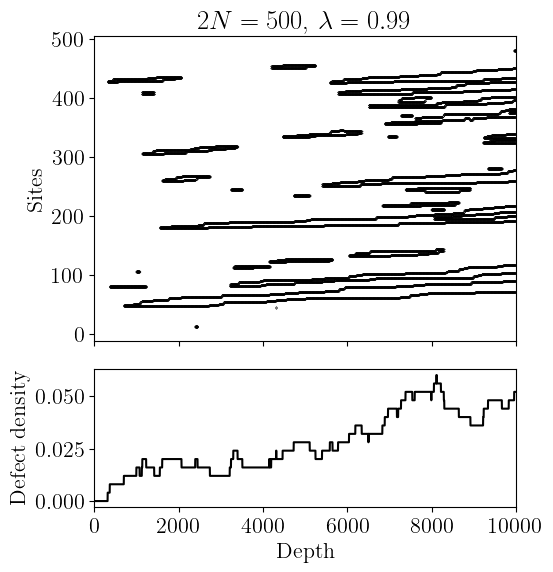

In [13]:
# fig = simulate_and_plot(100, 0.99, 10000)
fig = simulate_and_plot(500, 0.99, 10000)
# fig = simulate_and_plot(500, 0.99, 100000)
# simulate_and_plot(1000, 0.99, 100000)
fig.savefig("traj-dynamics.pdf")
plt.show()

### With open boundary conditions

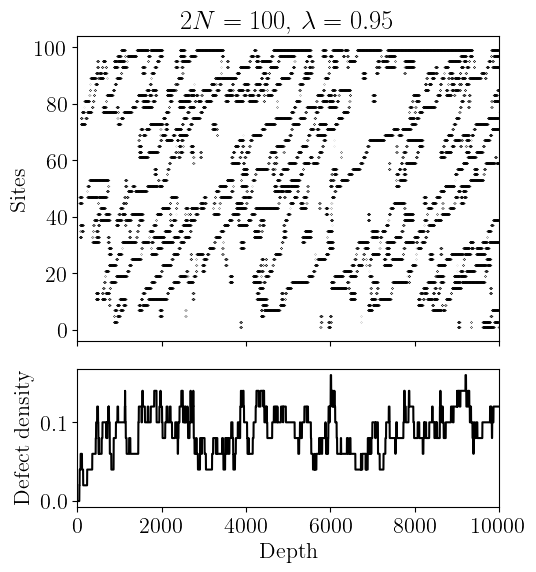

In [14]:
fig = simulate_and_plot(100, 0.95, 10000, False)
# simulate_and_plot(100, 0.99, 100000, False)
# simulate_and_plot(500, 0.99, 10000, False)
# simulate_and_plot(500, 0.99, 100000, False)
# simulate_and_plot(1000, 0.99, 100000, False)

## Many trajectories

In [27]:
def density(nqubits, lam, maxdepth, pbc=True, num_trajs=50):

    sims = [Simulation() for _ in range(num_trajs)]
    for sim in sims:
        sim.initialize(nqubits)

    ys = np.zeros((maxdepth, num_trajs))

    for d in range(maxdepth):
        for i in range(1, nqubits, 2):
            # we only care about the values on even sites (odd in Python 0 indexing)
            for j, sim in enumerate(sims):
                expX = sim.peek_x(i)
                if expX == -1:
                    ys[d, j] += 1
        for sim in sims:
            sim.E_lambda(random.randint(0, nqubits - 1), lam, pbc)

    ys /= nqubits

    fig = plt.figure()

    plt.title(f"$2N = {nqubits}$, $\lambda = {lam}$")
    plt.ylabel("Defect density")
    plt.xlabel("Depth")
    plt.xlim([0, maxdepth])

    x = range(maxdepth)
    y = np.mean(ys, axis=1)
    yerr = np.std(ys, axis=1)
    # plt.errorbar(x, y, yerr, color="k")
    # plt.plot(x, y, color="#CC4F1B")
    plt.plot(x, y, color="k")
    # plt.fill_between(x, y-yerr, y+yerr)
    plt.fill_between(
        x, y - yerr, y + yerr, alpha=0.5, edgecolor="#CC4F1B", facecolor="#FF9848"
    )

    return fig

With PBC

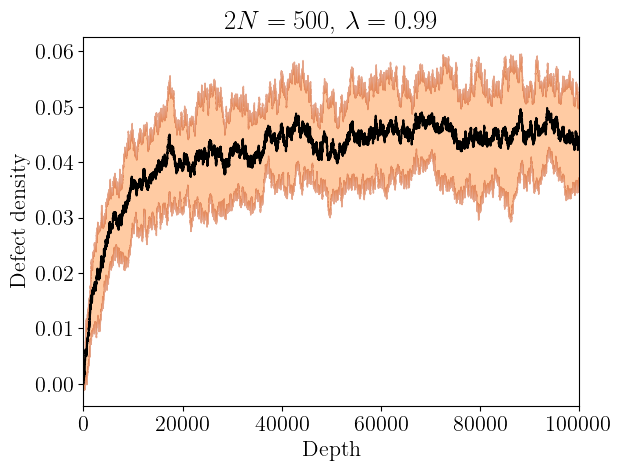

In [30]:
# fig = density(100, 0.99, 10000)
# fig = density(500, 0.99, 10000)
fig = density(500, 0.99, 100000)
# fig = density(500, 0.99, 100000)
# density(1000, 0.99, 100000)
# fig.savefig("density-dynamics.pdf")
plt.show()